In [1]:
import pandas as pd
import numpy as np
import json
import re
from app_store_scraper import AppStore
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

## I. Choose of product.

We choose Slack as a product and company we analayse. For competitors we choose microsoft.teams and skype for business because they are all used for business communications. As we know business communications app are really popular now and used by all of working people. So, we hope to find many comments on them. Also we know that Slack had to stop working with russian market and it was a big scandall around it. But Teams and Skype as Microsoft product also had to create limits for working with russian market, but it wasn't so big scandal in Russia with it. So, it's interrsting to compare how users think of all this apps.


## II. Parse data

In [2]:
import pandas as pd
import numpy as np
import json
from app_store_scraper import AppStore

### Slack

In [3]:
slack = AppStore(country='ru', app_name='slack', app_id = '618783545')
slack.review(how_many=2000)
slack.reviews

2022-12-13 19:14:01,772 [INFO] Base - Initialised: AppStore('ru', 'slack', 618783545)
2022-12-13 19:14:01,775 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ru/app/slack/id618783545
2022-12-13 19:14:06,942 [INFO] Base - [id:618783545] Fetched 400 reviews (400 fetched in total)
2022-12-13 19:14:12,474 [INFO] Base - [id:618783545] Fetched 820 reviews (820 fetched in total)
2022-12-13 19:14:14,644 [INFO] Base - [id:618783545] Fetched 974 reviews (974 fetched in total)


[{'date': datetime.datetime(2017, 9, 21, 21, 56, 28),
  'review': 'Стал тупить и тормозить ещё сильнее',
  'rating': 2,
  'isEdited': False,
  'userName': 'TianaLoo',
  'title': 'С последним обновлением'},
 {'date': datetime.datetime(2022, 3, 13, 22, 8, 15),
  'review': 'Slack delete all information from work account - don’t trust this company - once a serious company, does business like a child',
  'rating': 1,
  'isEdited': False,
  'userName': 'pvsh1201',
  'title': 'Deleted information'},
 {'date': datetime.datetime(2022, 3, 13, 21, 30, 4),
  'review': 'Slack is an unreliable company that removes paid workspace in messenger without warning',
  'rating': 1,
  'isEdited': False,
  'userName': 'Иван екб 2017',
  'title': 'Do not use for business'},
 {'date': datetime.datetime(2022, 3, 13, 21, 1, 19),
  'review': 'Business account was removed without notification. \nI lost all contacts and work chats.',
  'rating': 1,
  'isEdited': False,
  'userName': 'kruzhk',
  'title': 'Slack kick 

In [4]:
slackdf = pd.DataFrame(np.array(slack.reviews),columns=['review'])
slackdf2 = slackdf.join(pd.DataFrame(slackdf.pop('review').tolist()))
slackdf2.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2017-09-21 21:56:28,Стал тупить и тормозить ещё сильнее,2,False,TianaLoo,С последним обновлением,NaN
1,2022-03-13 22:08:15,Slack delete all information from work account...,1,False,pvsh1201,Deleted information,NaN
2,2022-03-13 21:30:04,Slack is an unreliable company that removes pa...,1,False,Иван екб 2017,Do not use for business,NaN
3,2022-03-13 21:01:19,Business account was removed without notificat...,1,False,kruzhk,Slack kick workspace,NaN
4,2022-03-13 23:12:09,Удалено без предупреждения рабочее пространств...,1,False,capitanov,Negative,NaN


Some comments in russian so we download them as excel file to translate it.

In [5]:
slackdf2.to_excel('Slack.xlsx')

### Teams

In [6]:
teams = AppStore(country='ru', app_name='microsoft-teams', app_id = '1113153706')
teams.review(how_many=2000)
teams.reviews

2022-12-13 19:14:16,261 [INFO] Base - Initialised: AppStore('ru', 'microsoft-teams', 1113153706)
2022-12-13 19:14:16,275 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ru/app/microsoft-teams/id1113153706
2022-12-13 19:14:21,363 [INFO] Base - [id:1113153706] Fetched 380 reviews (380 fetched in total)
2022-12-13 19:14:26,748 [INFO] Base - [id:1113153706] Fetched 780 reviews (780 fetched in total)
2022-12-13 19:14:48,716 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/ru/apps/1113153706/reviews?l=en-GB&offset=1020&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))
2022-12-13 19:14:48,720 [INFO] Base - [id:1113153706] Fetched 1020 reviews (1020 fetched in total)


[{'date': datetime.datetime(2020, 4, 14, 6, 56, 26),
  'review': 'Не могу добавить фото в свой профиль. «Не удалось отправить изображение». Долго это будет продолжаться?',
  'rating': 2,
  'isEdited': False,
  'userName': 'marchinjamaica',
  'title': 'Баг'},
 {'date': datetime.datetime(2020, 10, 1, 7, 59, 7),
  'review': 'из-за карантина пришлось заниматься дистанционно. но сменилась программа для уроков - теперь весь город сидит в тимс. ох.... каждый раз, когда я перехожу по ссылке из дневника на конференцию, тимс то вылетает, то кнопки «присоединиться к конференции» нет, то при подключении звук есть, а экран не активен. \nзайти на конференцию получается с третей-четвёртой попытки.',
  'rating': 1,
  'isEdited': False,
  'userName': ':)Kate:)18',
  'title': 'неудобно'},
 {'date': datetime.datetime(2020, 3, 30, 5, 59, 36),
  'review': 'Это мой первый в жизни отзыв. Но у меня реально бомбануло. Почему зарегаться в этом приложении так сложно?// юзер Френдли? Не. Не видели. После нажатия 

In [7]:
teamsdf = pd.DataFrame(np.array(teams.reviews),columns=['review'])
teamsdf2 = teamsdf.join(pd.DataFrame(teamsdf.pop('review').tolist()))
teamsdf2.head()

,date,review,rating,isEdited,userName,title
0,2020-04-14 06:56:26,Не могу добавить фото в свой профиль. «Не удал...,2,False,marchinjamaica,Баг
1,2020-10-01 07:59:07,из-за карантина пришлось заниматься дистанцион...,1,False,:)Kate:)18,неудобно
2,2020-03-30 05:59:36,Это мой первый в жизни отзыв. Но у меня реальн...,1,False,о. м,Регистрация через ж
3,2020-10-28 21:00:57,САМОЕ БАГОВОЕ И УЖАСНОЕ ПРИЛОЖЕНИЕ! ИЗ ЗА ДИСТ...,1,False,228 лол 228,УЖАС ПРОСТО
4,2020-04-09 21:02:56,"Бестолковый интерфейс, как всегда у Майкрософт...",1,False,virgodad 45,Типичная майкрософтовская дрянь


In [8]:
teamsdf2.to_excel('Teams.xlsx')

### Skype

In [9]:
skype = AppStore(country='ru', app_name='skype-for-business', app_id = '605841731')
skype.review(how_many=2000)
skype.reviews

2022-12-13 19:14:49,949 [INFO] Base - Initialised: AppStore('ru', 'skype-for-business', 605841731)
2022-12-13 19:14:49,954 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ru/app/skype-for-business/id605841731
2022-12-13 19:15:08,674 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/ru/apps/605841731/reviews?l=en-GB&offset=0&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))
2022-12-13 19:15:08,685 [INFO] Base - [id:605841731] Fetched 0 reviews (0 fetched in total)


[]

In [10]:
skypedf = pd.DataFrame(np.array(skype.reviews),columns=['review'])
skypedf2 = skypedf.join(pd.DataFrame(skypedf.pop('review').tolist()))
skypedf2.head()

""


In [11]:
skypedf2.to_excel('Skype.xlsx')

### Import translated data

In [12]:
df_slack = pd.read_excel('Slack.ru.en.xlsx')

In [13]:
df_slack.head()

,Unnamed: 0,0,review,title,userName,isEdited,date,rating,developerResponse
0,0,0,Began to blunt and slow down even more,With latest update,TianaLoo,False,2017-09-21 21:56:28,2,NaN
1,1,1,Slack delete all information from work account...,Deleted information,pvsh1201,False,2022-03-13 22:08:15,1,NaN
2,2,2,Slack is an unreliable company that removes pa...,Do not use for business,Ivan ekb 2017,False,2022-03-13 21:30:04,1,NaN
3,3,3,Business account was removed without notice. I...,Slack kick workspace,kruzhk,False,2022-03-13 21:01:19,1,NaN
4,4,4,Removed without warning a workspace for severa...,Negative,capitanov,False,2022-03-13 23:12:09,1,NaN


In [14]:
df_slack = df_slack.drop(['Unnamed: 0', '0'], axis = 1)

In [15]:
df_teams = pd.read_excel('Teams.ru.en.xlsx')

In [16]:
df_teams.head()

,Unnamed: 0,date,isEdited,userName,review,title,rating,developerResponse
0,0,2020-04-14 06:56:26,False,marchinjamaica,"I can't add a photo to my profile. ""Failed to ...",Bug,2,NaN
1,1,2020-10-01 07:59:07,False,:)Kate:)18,"Because of the quarantine, I had to work remot...",uncomfortable,1,NaN
2,2,2020-03-30 05:59:36,False,about. m,This is my first ever review. But I really got...,Registration via,1,NaN
3,3,2020-10-28 21:00:57,False,228 lol 228,THE MOST BUGGING AND HORRIBLE APP EVER! BECAUS...,HORROR JUST,1,NaN
4,4,2020-04-09 21:02:56,False,45,"Stupid interface, as always with Microsoft. Th...",Typical Microsoft bullshit,1,NaN


In [17]:
df_teams = df_teams.drop(['Unnamed: 0'], axis = 1)

In [18]:
df_skype = pd.read_excel('Skype.ru.en.xlsx')

In [19]:
df_skype.head()

,Unnamed: 0,date,userName,title,isEdited,review,rating
0,0,2018-02-13 14:22:16,Halt ran,iPhone 5 support,False,Why was iPhone 5 support removed? What does he...,4
1,1,2019-09-25 17:26:55,submorga,Earned! Read like,False,Stopped running. Crashes immediately after lau...,4
2,2,2019-12-20 08:11:34,spinnstdu!,Does not work,False,Dear developers! What happened to the app? Eve...,1
3,3,2020-05-16 05:49:37,daria5697,Lacks functionality,False,"When the application is in the background, it ...",2
4,4,2021-12-18 07:14:54,Lopatsinsky Anton,Unable to sign in.,False,"Writes to check account information, double-ch...",1


In [20]:
df_skype = df_skype.drop(['Unnamed: 0'], axis = 1)

## III. Data preprocessing

In [21]:
df_slack.head()

,review,title,userName,isEdited,date,rating,developerResponse
0,Began to blunt and slow down even more,With latest update,TianaLoo,False,2017-09-21 21:56:28,2,NaN
1,Slack delete all information from work account...,Deleted information,pvsh1201,False,2022-03-13 22:08:15,1,NaN
2,Slack is an unreliable company that removes pa...,Do not use for business,Ivan ekb 2017,False,2022-03-13 21:30:04,1,NaN
3,Business account was removed without notice. I...,Slack kick workspace,kruzhk,False,2022-03-13 21:01:19,1,NaN
4,Removed without warning a workspace for severa...,Negative,capitanov,False,2022-03-13 23:12:09,1,NaN


In [22]:
df_slack['response'] = df_slack.developerResponse.isnull().apply(lambda x: 0 if x is True else 1)

In [23]:
df_slack

,review,title,userName,isEdited,date,rating,developerResponse,response
0,Began to blunt and slow down even more,With latest update,TianaLoo,False,2017-09-21 21:56:28,2,NaN,0
1,Slack delete all information from work account...,Deleted information,pvsh1201,False,2022-03-13 22:08:15,1,NaN,0
2,Slack is an unreliable company that removes pa...,Do not use for business,Ivan ekb 2017,False,2022-03-13 21:30:04,1,NaN,0
3,Business account was removed without notice. I...,Slack kick workspace,kruzhk,False,2022-03-13 21:01:19,1,NaN,0
4,Removed without warning a workspace for severa...,Negative,capitanov,False,2022-03-13 23:12:09,1,NaN,0
...,...,...,...,...,...,...,...,...
655,Not works in Russia!,Change hosting,Gruver97,True,2018-11-10 12:29:59,5,"{'id': 3204469, 'body': ""Sorry about that. We'...",1
656,Hi! I want to help in translation Slack in Rus...,Add English language,antesianka,False,2018-11-09 20:22:42,5,NaN,0
657,iPhone 6s Quick reply from locked screen doesn...,Quick reply works bad,SpoiledV,False,2018-10-25 20:56:53,3,NaN,0
658,"Really had this problem with unread messages, ...",Thanks for the bug fixes!,yuliamenzhulina,False,2018-10-20 21:33:37,4,NaN,0


In [24]:
df_slack['review_l'] = df_slack['review'].str.lower()
df_teams['review_l'] = df_teams['review'].str.lower()
df_skype['review_l'] = df_skype['review'].str.lower()

In [25]:
df_slack['app'] = 'slack'
df_teams['app'] = 'teams'
df_skype['app'] = 'skype'

In [26]:
df_all = pd.concat([df_slack, df_teams, df_skype], ignore_index=True)

In [27]:
df_all.head()

,review,title,userName,isEdited,date,rating,developerResponse,response,review_l,app
0,Began to blunt and slow down even more,With latest update,TianaLoo,False,2017-09-21 21:56:28,2,NaN,0.0,began to blunt and slow down even more,slack
1,Slack delete all information from work account...,Deleted information,pvsh1201,False,2022-03-13 22:08:15,1,NaN,0.0,slack delete all information from work account...,slack
2,Slack is an unreliable company that removes pa...,Do not use for business,Ivan ekb 2017,False,2022-03-13 21:30:04,1,NaN,0.0,slack is an unreliable company that removes pa...,slack
3,Business account was removed without notice. I...,Slack kick workspace,kruzhk,False,2022-03-13 21:01:19,1,NaN,0.0,business account was removed without notice. i...,slack
4,Removed without warning a workspace for severa...,Negative,capitanov,False,2022-03-13 23:12:09,1,NaN,0.0,removed without warning a workspace for severa...,slack


In [28]:
from wordcloud import WordCloud

In [29]:
import matplotlib.pyplot as plt

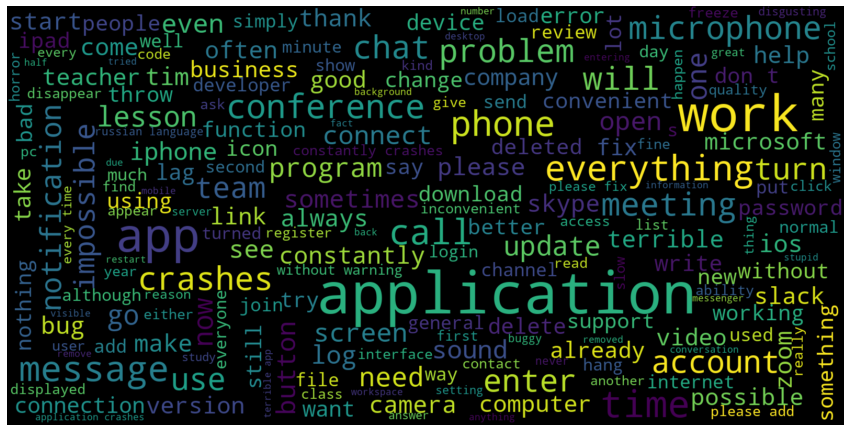

In [30]:
consolidated=' '.join(word for word in df_all['review_l'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
from nltk.corpus import stopwords

In [32]:
stp_words=set(stopwords.words('english'))
stp_words.update(['great', 'good', 'useful', 'like', 'app', 'please', 'message', \
                  'work', 'fix', 'open', 'application', 'cannot', 'everything', 'use', 'even', 'already', \
                 'often', 'although', 'first', 'need', 'everyone', 'using', 'always', 'don t', 'sometimes']) 

In [33]:
def clean_review(review):
    cleanreview=" ".join(word for word in review.
                       split(' ') if word not in stp_words)
    return cleanreview

In [34]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in string.punctuation)
    return final

In [35]:
#def remove_punctuation(text):
#    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"', \
#                                                 ',', ')', '(', '%', '&', '#', '@', '-', ''))
#    return final

In [36]:
def clean_digits(review):
    result=" ".join(word for word in review.
                       split() if not word.isdigit())
    return result

In [37]:
df_all['Review_stp_wrd_clean'] = df_all['review_l'].apply(remove_punctuation)

In [38]:
df_all['Review_stp_wrd_clean'] = df_all['Review_stp_wrd_clean'].apply(clean_review)

In [39]:
df_all['Review_stp_wrd_clean'] = df_all['Review_stp_wrd_clean'].apply(clean_digits)

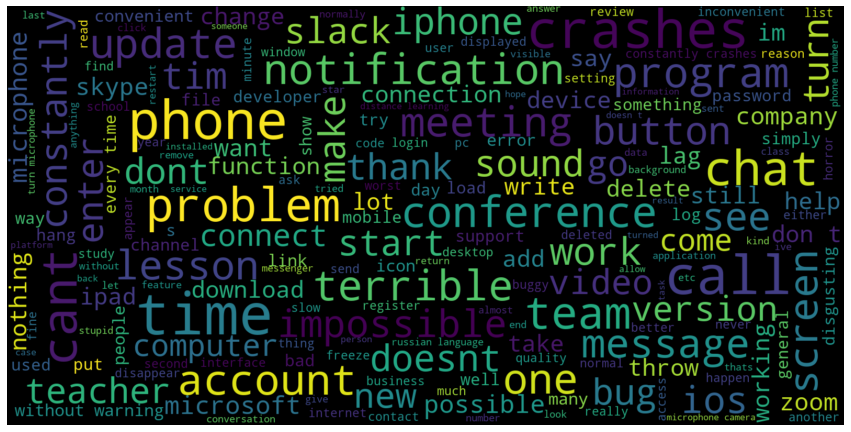

In [40]:
consolidated=' '.join(word for word in df_all['Review_stp_wrd_clean'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
stp_words.update(['see', 'well', 'lot', 'let', 'almost', 'better', 'without', 'last', 'don', 't']) 

In [42]:
df_all['Review_stp_wrd_clean'] = df_all['Review_stp_wrd_clean'].apply(clean_review)

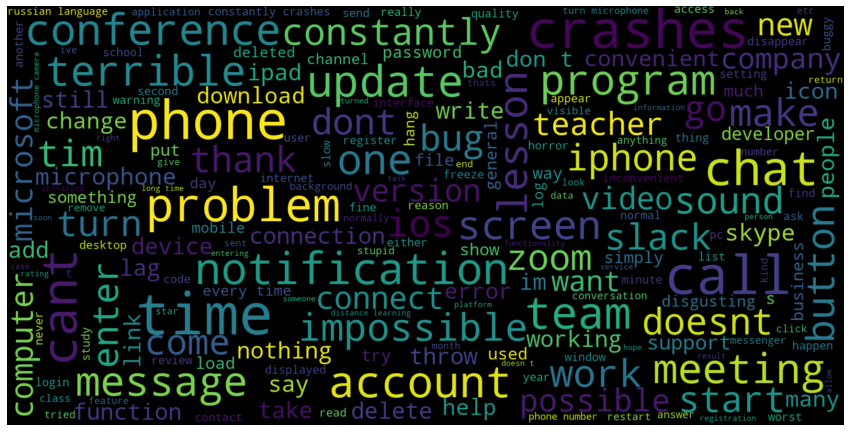

In [43]:
consolidated=' '.join(word for word in df_all['Review_stp_wrd_clean'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
#data for sentimental analysis
df_slack = df_slack.dropna(subset=['title'])
df_slack['title'] = df_slack['title'].apply(remove_punctuation)

2022-12-13 19:15:17,654 [INFO] numexpr.utils - NumExpr defaulting to 8 threads.


In [45]:
df_teams = df_teams.dropna(subset=['title'])
df_teams['title'] = df_teams['title'].apply(remove_punctuation)

In [46]:
df_skype = df_skype.dropna(subset=['title'])
df_skype['title'] = df_skype['title'].apply(remove_punctuation)

### IV. Semantic analysis and reputational metrics

Slack

In [194]:
df_slackNew = df_all[df_all['app'] == 'slack']

In [187]:
fig = px.histogram(df_slackNew, x="rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

In [188]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df_slack = df_slackNew[df_slackNew['rating'] != 3]
df_slack['sentiment'] = df_slackNew['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [189]:
positive = df_slack[df_slack['sentiment'] == 1]
negative = df_slack[df_slack['sentiment'] == -1]
positive = positive.dropna()
negative = negative.dropna()

Wordcloud — Positive Sentiment

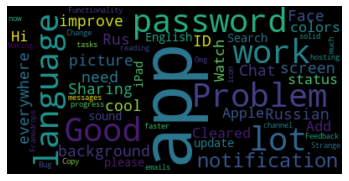

In [51]:
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
stopwords.update(['great', 'good', 'useful', 'like', 'app', 'please', 'message', \
                  'work', 'slack', 'fix', 'open']) 
pos = " ".join(review for review in positive.title)
wordcloud = WordCloud(stopwords = stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud — Negative Sentiment

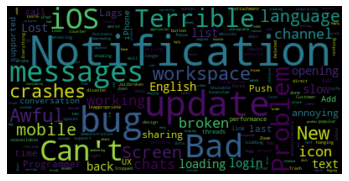

In [52]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
stopwords.update(['great', 'good', 'useful', 'like', 'app', 'please', 'message', \
                  'work', 'slack', 'fix', 'open']) 
negreviews = " ".join(review for review in negative.title)
wordcloud = WordCloud(stopwords=stopwords).generate(negreviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
df_slack['sentimentt'] = df_slack['sentiment'].replace({-1 : 'negative'})
df_slack['sentimentt'] = df_slack['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df_slack, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [190]:
df_slack.sentiment.value_counts()

-1    445
 1    154
Name: sentiment, dtype: int64

In [195]:
df_slackNew.shape

(660, 15)

In [193]:
print(f'For the Slack {445/660}% of comments are negative and {154/660}% of comments are positive')

For the Slack 0.6742424242424242% of comments are negative and 0.23333333333333334% of comments are positive


In [54]:
index = df_slack.index
df_slack['random_number'] = np.random.randn(len(index))
train = df_slack[df_slack['random_number'] <= 0.8]
test = df_slack[df_slack['random_number'] > 0.8]

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['title'])
test_matrix = vectorizer.transform(test['title'])

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=6000)

In [57]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=6000)

In [60]:
predictions = lr.predict(X_test)
print(predictions)

[-1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1
  1  1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1  1  1]


In [61]:
# find accuracy, precision, recall:

from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[84, 16],
       [17, 20]], dtype=int64)

In [62]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.83      0.84      0.84       100
           1       0.56      0.54      0.55        37

    accuracy                           0.76       137
   macro avg       0.69      0.69      0.69       137
weighted avg       0.76      0.76      0.76       137



In [147]:
df_teamsNew = df_all[df_all['app'] == 'teams']

In [151]:
fig = px.histogram(df_teamsNew, x="rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

In [160]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df_teams = df_teamsNew[df_teamsNew['rating'] != 3]
df_teams['sentiment'] = df_teamsNew['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [161]:
df_teams['sentimentt'] = df_teams['sentiment'].replace({-1 : 'negative'})
df_teams['sentimentt'] = df_teams['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df_teams, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [198]:
df_teams.sentiment.value_counts()

-1    1153
 1     243
Name: sentiment, dtype: int64

In [200]:
df_teamsNew.shape

(1512, 11)

In [201]:
print(f'For the Teams {1153/1512}% of comments are negative and {243/1512}% of comments are positive')

For the Teams 0.7625661375661376% of comments are negative and 0.16071428571428573% of comments are positive


In [157]:
df_skypeNew = df_all[df_all['app'] == 'skype']

In [158]:
fig = px.histogram(df_skypeNew, x="rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

In [162]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df_skype = df_skypeNew[df_skypeNew['rating'] != 3]
df_skype['sentiment'] = df_skypeNew['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [163]:
df_skype['sentimentt'] = df_skype['sentiment'].replace({-1 : 'negative'})
df_skype['sentimentt'] = df_skype['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df_skype, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [202]:
df_skype.sentiment.value_counts()

-1    287
 1    134
Name: sentiment, dtype: int64

In [204]:
df_skypeNew.shape

(476, 11)

In [205]:
print(f'For the Teams {287/467}% of comments are negative and {134/467}% of comments are positive')

For the Teams 0.6145610278372591% of comments are negative and 0.28693790149892934% of comments are positive


In [174]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Arisha\AppData\Roaming\nltk_data...


In [176]:
df_all['sent']  = df_all['Review_stp_wrd_clean'].apply(sid.polarity_scores)

In [180]:
df_all['vard_negative'] = df_all['sent'].apply(lambda x: x.get('neg'))

In [181]:
df_all['vard_neutral'] = df_all['sent'].apply(lambda x: x.get('neu'))

In [182]:
df_all['vard_positive'] = df_all['sent'].apply(lambda x: x.get('pos'))

In [210]:
df_all['vard_compaund'] = df_all['sent'].apply(lambda x: x.get('compound'))

In [183]:
print('Mean probability of comments being negative', df_all['vard_negative'].mean())
print('Mean probability of comments being neutral', df_all['vard_neutral'].mean())
print('Mean probability of comments being positive', df_all['vard_positive'].mean())

Mean probability of comments being negative 0.14932741691842902
Mean probability of comments being neutral 0.7314780966767369
Mean probability of comments being positive 0.10484554380664664


In [217]:
df_all['comp_score'] = df_all['vard_compaund'].apply(lambda c: 'pos' if c >= 0 else 'neg')

In [218]:
fig = px.histogram(df_all[df_all['app'] == 'slack'], x="comp_score")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [219]:
fig = px.histogram(df_all[df_all['app'] == 'skype'], x="comp_score")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [220]:
fig = px.histogram(df_all[df_all['app'] == 'teams'], x="comp_score")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

When we use Vard we see that we have more positive and neutral scores as we consider when we use raiting as a rule for sentiment.
Maybe it's because we have many neutral comments with low raiting.

### Reputational metrics

In [63]:
df_all['Review_stp_wrd_clean'] = df_all['Review_stp_wrd_clean'].apply(remove_punctuation)

In [64]:
texts = df_all['Review_stp_wrd_clean'].to_list()

In [65]:
brands = ['slack', 'teams', 'skype']

In [66]:
texts = [t.split() for t in texts]
stemmer = SnowballStemmer("english")
texts = [[stemmer.stem(w) if w not in brands else w for w in t] for t in texts]
texts[0]

['began', 'blunt', 'slow']

The calculation of prevalence, which counts the frequency of occurrence of each brand name — subsequently standardized considering the scores of all the words in the texts.

In [67]:
#PREVALENCE
#Import Counter and Numpy
from collections import Counter
import numpy as np

#Create a dictionary with frequency counts for each word
countPR = Counter()
for t in texts:
    countPR.update(Counter(t))

#Calculate average score and standard deviation
avgPR = np.mean(list(countPR.values()))
stdPR = np.std(list(countPR.values()))

#Calculate standardized Prevalence for each brand
PREVALENCE = {}
for brand in brands:
    PREVALENCE[brand] = (countPR[brand] - avgPR) / stdPR
    print("Prevalence", brand, PREVALENCE[brand])

Prevalence slack 3.508691504081527
Prevalence teams 3.6240423167834583
Prevalence skype 3.700942858584746


Transformation texts into a social network where nodes are words and links are weighted according to the number of co-occurrences between each pair of words. 

In [68]:
#Import Networkx
import networkx as nx

#Choose a co-occurrence range
co_range = 7

#Create an undirected Network Graph
G = nx.Graph()

#Each word is a network node
nodes = set([item for sublist in texts for item in sublist])
G.add_nodes_from(nodes)

#Add links based on co-occurrences
for doc in texts:
    w_list = []
    length= len(doc)
    for k, w in enumerate(doc):
        #Define range, based on document length
        if (k+co_range) >= length:
            superior = length
        else:
            superior = k+co_range+1
        #Create the list of co-occurring words
        if k < length-1:
            for i in range(k+1,superior):
                linked_word = doc[i].split()
                w_list = w_list + linked_word
        #If the list is not empty, create the network links
        if w_list:    
            for p in w_list:
                if G.has_edge(w,p):
                    G[w][p]['weight'] += 1
                else:
                    G.add_edge(w, p, weight=1)
        w_list = []

#Remove negligible co-occurrences based on a filter
link_filter = 2
#Create a new Graph which has only links above
#the minimum co-occurrence threshold
G_filtered = nx.Graph() 
G_filtered.add_nodes_from(G)
for u,v,data in G.edges(data=True):
    if data['weight'] >= link_filter:
        G_filtered.add_edge(u, v, weight=data['weight'])

#Optional removal of isolates
isolates = set(nx.isolates(G_filtered))
isolates -= set(brands)
G_filtered.remove_nodes_from(isolates)

#Check the resulting graph (for small test graphs)
#G_filtered.nodes()
#G_filtered.edges(data = True)
print("Original Network\nNo. of Nodes:", G.number_of_nodes(), "No. of Edges:", G.number_of_edges())
print("Filtered Network\nNo. of Nodes:", G_filtered.number_of_nodes(), "No. of Edges:", G_filtered.number_of_edges())


Original Network
No. of Nodes: 3134 No. of Edges: 90068
Filtered Network
No. of Nodes: 1871 No. of Edges: 23341


Having determined the co-occurrence network, we can now calculate diversity and connectivity, which are distinctiveness centrality (previously we used degree) and weighted betweenness centrality of a brand node. We standardize these values as we did with prevalence.

In [69]:
#INSTALL AND IMPORT THE DISTINCTIVENESS PACKAGE
#pip install -U distinctiveness
from distinctiveness.dc import distinctiveness

#DIVERSITY
#Calculate Distinctiveness Centrality
DC = distinctiveness(G_filtered, normalize = False, alpha = 1)
DIVERSITY_sequence=DC["D2"]
#Calculate average score and standard deviation
avgDI = np.mean(list(DIVERSITY_sequence.values()))
stdDI = np.std(list(DIVERSITY_sequence.values()))
#Calculate standardized Diversity for each brand
DIVERSITY = {}
for brand in brands:
    DIVERSITY[brand] = (DIVERSITY_sequence[brand] - avgDI) / stdDI
    print("Diversity", brand, DIVERSITY[brand])

Diversity slack 2.8440396953035934
Diversity teams 3.4887136155361995
Diversity skype 3.9248355389704495


In [71]:
#Define inverse weights 
for u,v,data in G_filtered.edges(data=True):
    if 'weight' in data and data['weight'] != 0:
        data['inverse'] = 1/data['weight']
    else:
        data['inverse'] = 1   

#CONNECTIVITY
CONNECTIVITY_sequence=nx.betweenness_centrality(G_filtered, normalized=False, weight ='inverse')
#Calculate average score and standard deviation
avgCO = np.mean(list(CONNECTIVITY_sequence.values()))
stdCO = np.std(list(CONNECTIVITY_sequence.values()))
#Calculate standardized Prevalence for each brand
CONNECTIVITY = {}
for brand in brands:
    CONNECTIVITY[brand] = (CONNECTIVITY_sequence[brand] - avgCO) / stdCO
    print("Connectivity", brand, CONNECTIVITY[brand])

Connectivity slack 2.086261469804528
Connectivity teams 0.6229806011656549
Connectivity skype 2.954843503725364


In [72]:
#Obtain the Semantic Brand Score of each brand
SBS = {}
for brand in brands:
    SBS[brand] = PREVALENCE[brand] + DIVERSITY[brand] + CONNECTIVITY[brand]
    print("SBS", brand, SBS[brand])

SBS slack 8.438992669189648
SBS teams 7.735736533485313
SBS skype 10.580621901280558


In [109]:
#Generate a final pandas data frame with all results
import pandas as pd

PREVALENCE = pd.DataFrame.from_dict(PREVALENCE, orient="index", columns = ["PREVALENCE"])
DIVERSITY = pd.DataFrame.from_dict(DIVERSITY, orient="index", columns = ["DIVERSITY"])
CONNECTIVITY = pd.DataFrame.from_dict(CONNECTIVITY, orient="index", columns = ["CONNECTIVITY"])
SBS = pd.DataFrame.from_dict(SBS, orient="index", columns = ["SBS"])

SBS = pd.concat([PREVALENCE, DIVERSITY, CONNECTIVITY, SBS], axis=1, sort=False)
SBS

,PREVALENCE,DIVERSITY,CONNECTIVITY,SBS
slack,3.508692,2.844040,2.086261,8.438993
teams,3.624042,3.488714,0.622981,7.735737
skype,3.700943,3.924836,2.954844,10.580622


For all reputational brand metrics, except connectivity, Slack is worse then his competitors. 

## V. Topic modeling

Using LDA model

Goal - find 3 most common topics for all apps and for each one to compare.

In [110]:
stp_words.update(['slack', 'teams', 'skype', 'ios', 'iphone', 'ipad'] )
df_all['Review_stp_wrd_clean'] = df_all['Review_stp_wrd_clean'].apply(clean_review)

In [111]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_all.Review_stp_wrd_clean.values.tolist()
data_words = list(sent_to_words(data))

In [112]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

2022-12-13 19:23:19,043 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary<0 unique tokens: []>
2022-12-13 19:23:19,096 [INFO] gensim.corpora.dictionary - built Dictionary<4027 unique tokens: ['began', 'blunt', 'slow', 'account', 'business']...> from 2648 documents (total 29652 corpus positions)
2022-12-13 19:23:19,097 [INFO] gensim.utils - Dictionary lifecycle event {'msg': "built Dictionary<4027 unique tokens: ['began', 'blunt', 'slow', 'account', 'business']...> from 2648 documents (total 29652 corpus positions)", 'datetime': '2022-12-13T19:23:19.097412', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [113]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

2022-12-13 19:23:19,717 [INFO] gensim.models.ldamodel - using symmetric alpha at 0.3333333333333333
2022-12-13 19:23:19,718 [INFO] gensim.models.ldamodel - using symmetric eta at 0.3333333333333333
2022-12-13 19:23:19,719 [INFO] gensim.models.ldamodel - using serial LDA version on this node
2022-12-13 19:23:19,723 [INFO] gensim.models.ldamulticore - running online LDA training, 3 topics, 1 passes over the supplied corpus of 2648 documents, updating every 14000 documents, evaluating every ~2648 documents, iterating 50x with a convergence threshold of 0.001000
2022-12-13 19:23:19,723 [WARNING] gensim.models.ldamulticore - too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-12-13 19:23:19,725 [INFO] gensim.models.ldamulticore - training LDA model using 7 processes
2022-12-13 19:23:26,634 [INFO] gensim.models.ldamulticore - PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/2648, outstanding queue size 1
2

[(0,
  '0.012*"crashes" + 0.010*"phone" + 0.009*"time" + 0.009*"screen" + '
  '0.009*"call" + 0.008*"conference" + 0.007*"enter" + 0.007*"constantly" + '
  '0.006*"turn" + 0.006*"terrible"'),
 (1,
  '0.009*"time" + 0.008*"cant" + 0.006*"crashes" + 0.006*"go" + 0.006*"phone" '
  '+ 0.006*"microphone" + 0.006*"screen" + 0.006*"version" + 0.005*"turn" + '
  '0.005*"messages"'),
 (2,
  '0.011*"crashes" + 0.009*"cant" + 0.008*"account" + 0.008*"chat" + '
  '0.007*"add" + 0.007*"impossible" + 0.007*"phone" + 0.007*"update" + '
  '0.006*"doesnt" + 0.006*"log"')]


It seems like for all apps users have some crashes in entering to the app, sending messages and  using microphones.
So, people talk about tech problems of using apps.

In [114]:
slack = df_all[df_all['app']=='slack']

In [115]:
data_slack = slack.Review_stp_wrd_clean.values.tolist()
data_words_slack = list(sent_to_words(data_slack))

In [116]:
# Create Dictionary
id2word_slack = corpora.Dictionary(data_words_slack)
# Create Corpus
texts_slack = data_words_slack
# Term Document Frequency
corpus_slack = [id2word_slack.doc2bow(text) for text in texts_slack]

2022-12-13 19:23:27,969 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary<0 unique tokens: []>
2022-12-13 19:23:27,983 [INFO] gensim.corpora.dictionary - built Dictionary<1692 unique tokens: ['began', 'blunt', 'slow', 'account', 'business']...> from 660 documents (total 5488 corpus positions)
2022-12-13 19:23:27,984 [INFO] gensim.utils - Dictionary lifecycle event {'msg': "built Dictionary<1692 unique tokens: ['began', 'blunt', 'slow', 'account', 'business']...> from 660 documents (total 5488 corpus positions)", 'datetime': '2022-12-13T19:23:27.984771', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [117]:
# number of topics
num_topics = 3
# Build LDA model
lda_model_slack = gensim.models.LdaMulticore(corpus=corpus_slack,
                                       id2word=id2word_slack,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_slack.print_topics())
doc_lda_slack = lda_model_slack[corpus_slack]

2022-12-13 19:23:28,011 [INFO] gensim.models.ldamodel - using symmetric alpha at 0.3333333333333333
2022-12-13 19:23:28,013 [INFO] gensim.models.ldamodel - using symmetric eta at 0.3333333333333333
2022-12-13 19:23:28,016 [INFO] gensim.models.ldamodel - using serial LDA version on this node
2022-12-13 19:23:28,017 [INFO] gensim.models.ldamulticore - running online LDA training, 3 topics, 1 passes over the supplied corpus of 660 documents, updating every 14000 documents, evaluating every ~660 documents, iterating 50x with a convergence threshold of 0.001000
2022-12-13 19:23:28,019 [WARNING] gensim.models.ldamulticore - too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-12-13 19:23:28,021 [INFO] gensim.models.ldamulticore - training LDA model using 7 processes
2022-12-13 19:23:35,274 [INFO] gensim.models.ldamulticore - PROGRESS: pass 0, dispatched chunk #0 = documents up to #660/660, outstanding queue size 1
2022-

[(0,
  '0.017*"deleted" + 0.012*"warning" + 0.009*"messages" + 0.009*"workspace" + '
  '0.009*"add" + 0.008*"cant" + 0.008*"notification" + 0.007*"paid" + '
  '0.006*"time" + 0.006*"account"'),
 (1,
  '0.009*"new" + 0.008*"notifications" + 0.008*"add" + 0.007*"mobile" + '
  '0.007*"working" + 0.007*"icon" + 0.006*"version" + 0.006*"russian" + '
  '0.006*"desktop" + 0.006*"doesnt"'),
 (2,
  '0.019*"russian" + 0.012*"messages" + 0.011*"company" + 0.011*"language" + '
  '0.010*"add" + 0.010*"update" + 0.009*"warning" + 0.008*"paid" + '
  '0.008*"removed" + 0.008*"new"')]


For Slack we see that people have problems with russian language and working of slack spaces in Russia. The topic of tech problems like microphones isn't so important here.

In [118]:
skype = df_all[df_all['app']=='skype']

In [119]:
data_skype = skype.Review_stp_wrd_clean.values.tolist()
data_words_skype = list(sent_to_words(data_skype))

In [120]:
# Create Dictionary
id2word_skype = corpora.Dictionary(data_words_skype)
# Create Corpus
texts_skype = data_words_skype
# Term Document Frequency
corpus_skype = [id2word_skype.doc2bow(text) for text in texts_skype]

2022-12-13 19:23:35,883 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary<0 unique tokens: []>
2022-12-13 19:23:35,896 [INFO] gensim.corpora.dictionary - built Dictionary<1476 unique tokens: ['lack', 'removed', 'support', 'colleagues', 'crashes']...> from 476 documents (total 4884 corpus positions)
2022-12-13 19:23:35,897 [INFO] gensim.utils - Dictionary lifecycle event {'msg': "built Dictionary<1476 unique tokens: ['lack', 'removed', 'support', 'colleagues', 'crashes']...> from 476 documents (total 4884 corpus positions)", 'datetime': '2022-12-13T19:23:35.897127', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [121]:
# number of topics
num_topics = 3
# Build LDA model
lda_model_skype = gensim.models.LdaMulticore(corpus=corpus_skype,
                                       id2word=id2word_skype,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_skype.print_topics())
doc_lda_skype = lda_model_skype[corpus_skype]

2022-12-13 19:23:35,910 [INFO] gensim.models.ldamodel - using symmetric alpha at 0.3333333333333333
2022-12-13 19:23:35,912 [INFO] gensim.models.ldamodel - using symmetric eta at 0.3333333333333333
2022-12-13 19:23:35,914 [INFO] gensim.models.ldamodel - using serial LDA version on this node
2022-12-13 19:23:35,916 [INFO] gensim.models.ldamulticore - running online LDA training, 3 topics, 1 passes over the supplied corpus of 476 documents, updating every 14000 documents, evaluating every ~476 documents, iterating 50x with a convergence threshold of 0.001000
2022-12-13 19:23:35,916 [WARNING] gensim.models.ldamulticore - too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-12-13 19:23:35,918 [INFO] gensim.models.ldamulticore - training LDA model using 7 processes
2022-12-13 19:23:36,630 [INFO] gensim.models.ldamulticore - PROGRESS: pass 0, dispatched chunk #0 = documents up to #476/476, outstanding queue size 1
2022-

[(0,
  '0.019*"call" + 0.015*"update" + 0.011*"messages" + 0.011*"version" + '
  '0.011*"working" + 0.009*"stopped" + 0.008*"cant" + 0.007*"crashes" + '
  '0.006*"calls" + 0.006*"screen"'),
 (1,
  '0.014*"phone" + 0.010*"call" + 0.009*"connect" + 0.008*"business" + '
  '0.008*"time" + 0.008*"account" + 0.008*"program" + 0.007*"log" + '
  '0.007*"version" + 0.007*"notifications"'),
 (2,
  '0.016*"call" + 0.008*"connection" + 0.008*"calls" + 0.008*"doesnt" + '
  '0.007*"messages" + 0.007*"works" + 0.006*"one" + 0.006*"constantly" + '
  '0.006*"connect" + 0.006*"update"')]


For skype we can say that the most common problems connected with new versions of ios and skype and updates and thid affect on calls and messages using.

In [122]:
teams = df_all[df_all['app']=='teams']

In [123]:
data_teams = teams.Review_stp_wrd_clean.values.tolist()
data_words_teams = list(sent_to_words(data_teams))

In [124]:
# Create Dictionary
id2word_teams = corpora.Dictionary(data_words_teams)
# Create Corpus
texts_teams = data_words_teams
# Term Document Frequency
corpus_teams = [id2word_teams.doc2bow(text) for text in texts_teams]

2022-12-13 19:23:38,328 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary<0 unique tokens: []>
2022-12-13 19:23:38,395 [INFO] gensim.corpora.dictionary - built Dictionary<3102 unique tokens: ['add', 'cant', 'continue', 'failed', 'image']...> from 1512 documents (total 19280 corpus positions)
2022-12-13 19:23:38,395 [INFO] gensim.utils - Dictionary lifecycle event {'msg': "built Dictionary<3102 unique tokens: ['add', 'cant', 'continue', 'failed', 'image']...> from 1512 documents (total 19280 corpus positions)", 'datetime': '2022-12-13T19:23:38.395965', 'gensim': '4.2.0', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


In [125]:
# number of topics
num_topics = 3
# Build LDA model
lda_model_teams = gensim.models.LdaMulticore(corpus=corpus_teams,
                                       id2word=id2word_teams,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_teams.print_topics())
doc_lda_teams = lda_model_skype[corpus_teams]

2022-12-13 19:23:38,436 [INFO] gensim.models.ldamodel - using symmetric alpha at 0.3333333333333333
2022-12-13 19:23:38,438 [INFO] gensim.models.ldamodel - using symmetric eta at 0.3333333333333333
2022-12-13 19:23:38,439 [INFO] gensim.models.ldamodel - using serial LDA version on this node
2022-12-13 19:23:38,442 [INFO] gensim.models.ldamulticore - running online LDA training, 3 topics, 1 passes over the supplied corpus of 1512 documents, updating every 14000 documents, evaluating every ~1512 documents, iterating 50x with a convergence threshold of 0.001000
2022-12-13 19:23:38,443 [WARNING] gensim.models.ldamulticore - too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-12-13 19:23:38,446 [INFO] gensim.models.ldamulticore - training LDA model using 7 processes
2022-12-13 19:23:45,367 [INFO] gensim.models.ldamulticore - PROGRESS: pass 0, dispatched chunk #0 = documents up to #1512/1512, outstanding queue size 1
2

[(0,
  '0.011*"meeting" + 0.011*"cant" + 0.007*"conference" + 0.007*"go" + '
  '0.006*"zoom" + 0.006*"times" + 0.006*"phone" + 0.006*"crashes" + '
  '0.006*"time" + 0.006*"screen"'),
 (1,
  '0.018*"crashes" + 0.012*"time" + 0.011*"microphone" + 0.009*"impossible" + '
  '0.009*"conference" + 0.009*"phone" + 0.008*"enter" + 0.007*"can" + '
  '0.007*"turn" + 0.007*"terrible"'),
 (2,
  '0.012*"crashes" + 0.008*"phone" + 0.008*"enter" + 0.008*"screen" + '
  '0.007*"one" + 0.006*"turn" + 0.006*"time" + 0.006*"constantly" + '
  '0.006*"microphone" + 0.006*"tims"')]


For teams we see also the tech problem issues. People have problems with entering to the app, video ans sound. There are some tech problems with all necessary features of call app. Also we see the negative tone in 3rd topic.

Another use of LDA model from another package: to compare results.

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords

In [127]:
corpus = df_all.Review_stp_wrd_clean.values.tolist()
count_vect = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
x_counts = count_vect.fit_transform(corpus)
x_counts.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [128]:
count_vect.get_feature_names()

['100gb',
 '10th',
 '11inch',
 '11th',
 '12th',
 '14th',
 '15th',
 '180',
 '18d61',
 '18th',
 '1gb',
 '1na1',
 '1st',
 '2000s',
 '2020',
 '20th',
 '21st',
 '26th',
 '27bil',
 '2fa',
 '2nd',
 '30minute',
 '314zdets',
 '3d',
 '3rd',
 '4gwifi',
 '4s',
 '4th',
 '5ke',
 '5s',
 '5th',
 '6c',
 '6ios',
 '6s',
 '6th',
 '7p',
 '8a',
 '8plus',
 '8th',
 '90s',
 'aaakrutkaaaaaaa',
 'abandon',
 'ability',
 'able',
 'absence',
 'absent',
 'absenteeism',
 'absolute',
 'absolutely',
 'abuse',
 'abysmal',
 'academic',
 'accelerated',
 'acceleration',
 'accept',
 'accepts',
 'access',
 'accesses',
 'accessibility',
 'accessible',
 'accidentally',
 'accompanied',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accounts',
 'achievements',
 'acpeds',
 'acquaintances',
 'acquisition',
 'across',
 'act',
 'action',
 'actions',
 'activate',
 'activated',
 'active',
 'actively',
 'activities',
 'activity',
 'actual',
 'actually',
 'ad',
 'adapt',
 'adapted',
 'add',
 'added',
 'adding',
 'addition',


In [129]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x_counts)

In [130]:
dimension = 2
lda = LDA(n_components = dimension)
lda_array = lda.fit_transform(x_tfidf)
lda_array

array([[0.78446941, 0.21553059],
       [0.15275035, 0.84724965],
       [0.14165961, 0.85834039],
       ...,
       [0.16002313, 0.83997687],
       [0.45741393, 0.54258607],
       [0.5       , 0.5       ]])

In [131]:
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect.get_feature_names()
important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
important_words

[['crashes', 'update', 'phone'], ['account', 'cant', 'russian']]

Also for all of apps the most important topic is crashes updates on phones and problems of account in russia.

In [132]:
corpus_slack = slack.Review_stp_wrd_clean.values.tolist()
count_vect_slack = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
x_counts_slack = count_vect_slack.fit_transform(corpus_slack)
x_counts_slack.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [133]:
count_vect_slack.get_feature_names()

['20th',
 '21st',
 '27bil',
 '2fa',
 '3d',
 '5s',
 '6ios',
 '6s',
 '8plus',
 'ability',
 'able',
 'absolutely',
 'abysmal',
 'accept',
 'accepts',
 'access',
 'accessibility',
 'accidentally',
 'according',
 'accordingly',
 'account',
 'accounts',
 'acquaintances',
 'across',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'adequately',
 'administrator',
 'adored',
 'advance',
 'advise',
 'affect',
 'affected',
 'afternoon',
 'ages',
 'aggressors',
 'ago',
 'agobut',
 'agree',
 'ahead',
 'air',
 'air2',
 'alerts',
 'allow',
 'allowing',
 'allows',
 'also',
 'alternative',
 'altogether',
 'amazing',
 'analogs',
 'android',
 'angry',
 'annoying',
 'annual',
 'another',
 'answer',
 'anymore',
 'anyone',
 'anything',
 'anytime',
 'anywhere',
 'apart',
 'apolitical',
 'app',
 'apparently',
 'appear',
 'appearance',
 'appeared',
 'appears',
 'appl',
 'apple',
 'application',
 'applicat

In [134]:
x_tfidf_slack = tfidf_transformer.fit_transform(x_counts_slack)

In [135]:
dimension = 2
lda = LDA(n_components = dimension)
lda_array_slack = lda.fit_transform(x_tfidf_slack)
lda_array_slack

array([[0.19359888, 0.80640112],
       [0.86972381, 0.13027619],
       [0.85729624, 0.14270376],
       ...,
       [0.12776025, 0.87223975],
       [0.84019394, 0.15980606],
       [0.23324466, 0.76675534]])

In [136]:
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect_slack.get_feature_names()
important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
important_words

[['warning', 'deleted', 'removed'], ['russian', 'add', 'language']]

For slack the most important topics is problem with apps in Russia and with the problem of slack deleted for russian users, as it seems.

In [137]:
corpus_teams = teams.Review_stp_wrd_clean.values.tolist()
count_vect_teams = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
x_counts_teams = count_vect_teams.fit_transform(corpus_teams)
x_counts_teams.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [138]:
count_vect_teams.get_feature_names()

['100gb',
 '10th',
 '11inch',
 '11th',
 '12th',
 '14th',
 '15th',
 '180',
 '18d61',
 '1gb',
 '2000s',
 '2020',
 '20th',
 '26th',
 '30minute',
 '314zdets',
 '3rd',
 '4th',
 '5s',
 '5th',
 '6c',
 '6s',
 '6th',
 '8a',
 '8plus',
 'aaakrutkaaaaaaa',
 'ability',
 'able',
 'absence',
 'absent',
 'absenteeism',
 'absolute',
 'absolutely',
 'abuse',
 'academic',
 'accelerated',
 'acceleration',
 'accept',
 'access',
 'accesses',
 'accessible',
 'accidentally',
 'accompanied',
 'according',
 'accordingly',
 'account',
 'accounts',
 'achievements',
 'acpeds',
 'across',
 'action',
 'actions',
 'activated',
 'active',
 'actively',
 'activities',
 'activity',
 'actual',
 'actually',
 'adapted',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'addressed',
 'addresses',
 'adequate',
 'adequately',
 'adies',
 'adjacent',
 'adjust',
 'adjusted',
 'administration',
 'administrative',
 'administrator',
 'admins',
 'advance',
 'advantages',
 'adventures',
 'advertisements',
 'advise',
 'affect',

In [139]:
x_tfidf_teams = tfidf_transformer.fit_transform(x_counts_teams)

In [140]:
dimension = 2
lda = LDA(n_components = dimension)
lda_array_teams = lda.fit_transform(x_tfidf_teams)
lda_array_teams

array([[0.77444735, 0.22555265],
       [0.88755364, 0.11244636],
       [0.10103522, 0.89896478],
       ...,
       [0.5       , 0.5       ],
       [0.28813012, 0.71186988],
       [0.84774289, 0.15225711]])

In [141]:
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect_teams.get_feature_names()
important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
important_words

[['microphone', 'time', 'turn'], ['crashes', 'cant', 'phone']]

For teams the most important topics is crashes while entering the app and some problems, we guess, while use the microphone at the meetings. 

In [142]:
corpus_skype = skype.Review_stp_wrd_clean.values.tolist()
count_vect_skype = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
x_counts_skype = count_vect_skype.fit_transform(corpus_skype)
x_counts_skype.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [143]:
count_vect_skype.get_feature_names()

['18th',
 '1na1',
 '1st',
 '21st',
 '2nd',
 '3d',
 '4gwifi',
 '4s',
 '5ke',
 '5s',
 '6s',
 '7p',
 '8plus',
 '8th',
 '90s',
 'abandon',
 'ability',
 'absolutely',
 'accept',
 'access',
 'accordance',
 'account',
 'accounts',
 'acquisition',
 'across',
 'activate',
 'activated',
 'active',
 'activity',
 'actually',
 'adapt',
 'adapted',
 'add',
 'added',
 'adding',
 'address',
 'addresses',
 'adequate',
 'admin',
 'advance',
 'advanced',
 'advise',
 'afternoon',
 'ago',
 'agree',
 'ahead',
 'airpods',
 'alas',
 'aliases',
 'allow',
 'allows',
 'along',
 'alphabet',
 'also',
 'ambiguous',
 'analogue',
 'android',
 'androids',
 'androyd',
 'annoying',
 'another',
 'answer',
 'answered',
 'answering',
 'anymore',
 'anyone',
 'apparently',
 'appear',
 'appearance',
 'appeared',
 'appears',
 'apples',
 'applications',
 'apps',
 'appstore',
 'area',
 'around',
 'arrive',
 'arrived',
 'arrives',
 'article',
 'ashamed',
 'asked',
 'asking',
 'asks',
 'assistant',
 'attach',
 'attached',
 'attach

In [144]:
x_tfidf_skype = tfidf_transformer.fit_transform(x_counts_skype)

In [145]:
dimension = 2
lda = LDA(n_components = dimension)
lda_array_skype = lda.fit_transform(x_tfidf_skype)
lda_array_skype

array([[0.1886994 , 0.8113006 ],
       [0.73848144, 0.26151856],
       [0.25200686, 0.74799314],
       [0.16929856, 0.83070144],
       [0.85477223, 0.14522777],
       [0.87114358, 0.12885642],
       [0.80539486, 0.19460514],
       [0.16012741, 0.83987259],
       [0.11622563, 0.88377437],
       [0.41168113, 0.58831887],
       [0.77836715, 0.22163285],
       [0.79684118, 0.20315882],
       [0.1801685 , 0.8198315 ],
       [0.84772204, 0.15227796],
       [0.16214414, 0.83785586],
       [0.65535524, 0.34464476],
       [0.15555706, 0.84444294],
       [0.80743171, 0.19256829],
       [0.15785815, 0.84214185],
       [0.79240009, 0.20759991],
       [0.14451358, 0.85548642],
       [0.22167188, 0.77832812],
       [0.1328224 , 0.8671776 ],
       [0.79221044, 0.20778956],
       [0.81101031, 0.18898969],
       [0.80192829, 0.19807171],
       [0.36331471, 0.63668529],
       [0.81295043, 0.18704957],
       [0.29013708, 0.70986292],
       [0.82789098, 0.17210902],
       [0.

In [108]:
components = [lda.components_[i] for i in range(len(lda.components_))]
features = count_vect_skype.get_feature_names()
important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse = True)[:3] for j in range(len(components))]
important_words

[['call', 'works', 'connection'], ['update', 'working', 'ios']]

For skype problems are simmilar with teams. People talk about working of calls on ios and crashes with connection.

So, the topic analysis show that in general people who used apps for meetings have many problems with entering to the apps and using all of main features like phone calls and messages. But when we start analyse each particular app, we see that for slack the most comments connect with availiability of the app in Russia and problems of using this app in russian language. As we know the Slack leave russian market, so it's really possible that on the russian app store it's popular topic. Skype and Teams also have some limits in Russia, but as we can see from our analysis, it doesn't affect them so much as Slack. 

## VI. Conclusion

As we see Slack has many low rating scores, but according to sentimental analysis we see that ost of comments are neutral or positive. When we analyse the reputation metric we found out that Slack has lower results but for all of the metrics it's quite similar. As the result of topic modeling we found out that the topic of comments are different from topic for competetiros. Slack users are talking about Slack leave from Russia and they don't like it. But users care about tech characteristics of Slack too.

Competitors - Teams and Microsoft, also similar to each other in metrics which we analyse. But we see that their users don't talk about app's leave Russia. Maybe it because Slack did it more scandalous, for example they disabled paid subscriptions without warning.

For all indystry we see the similar results. Apps has many low scores, but comments are really neutral. The most exiting topics for users are the tech problems of using this app, like problems with entering, microphones or calls organization.

So, in this industry company should make more news about tech updates of their apps and try to make their apps stable.